In [1]:
import sys,argparse,os,pandas,numpy,copy
sys.path.append('/home/heyangle/Desktop/ScanCraft/ScanCraft')
from command.file_operations.GetDirectories import GetDirectories
from command.file_operations.GetSamples import GetSamples

In [2]:
folders=GetDirectories(path='./random_samples/',keyword='record',numbered=True)

In [3]:
folders

['/home/heyangle/Desktop/rand_NTools/output/random_samples/record_1',
 '/home/heyangle/Desktop/rand_NTools/output/random_samples/record_2',
 '/home/heyangle/Desktop/rand_NTools/output/random_samples/record_3',
 '/home/heyangle/Desktop/rand_NTools/output/random_samples/record_4']

In [4]:
sample_collect=[
    GetSamples( path=os.path.join( folder,'' ), patterns=['inp','spectr','omega'] )
    for folder in folders
]

In [5]:
samples=sum(sample_collect,[])

In [7]:
samples[10000].__dict__

{'documents': {'inp': '/home/heyangle/Desktop/rand_NTools/output/random_samples/record_2/inp.dat.0',
  'omega': '/home/heyangle/Desktop/rand_NTools/output/random_samples/record_2/omega.dat.0',
  'spectr': '/home/heyangle/Desktop/rand_NTools/output/random_samples/record_2/spectr.dat.0'}}

In [15]:
# os.mkdir('random_samples')
# os.mkdir('random_samples/record_1')
# os.mkdir('random_samples/record_2')
# os.mkdir('random_samples/record_3')

In [21]:
for i, s in enumerate(samples[30000:]):
    new_documents={}
    new_documents['inp']=os.path.join('./random_samples/record_4/','inp.dat.'+str(i))
    new_documents['spectr']=new_documents['inp'].replace('inp','spectr')
    new_documents['omega']=new_documents['inp'].replace('inp','omega')
    s.MoveTo(new_documents)

In [8]:
from command.scan.scan import scan
from command.NMSSMTools import NMSSMTools
from command.data_transformer.InputListToPandas import InputListToPandas as I2P
mold=scan(method='random')
mold.AddScalar('tanB','MINPAR',3,1.,60.)
mold.AddScalar('M1','EXTPAR',1  ,20.    ,1000.)
mold.AddScalar('M2','EXTPAR'   ,2  ,100.    ,2000.)
mold.AddScalar('Atop','EXTPAR'   ,11  ,  -6e3    ,6e3)
mold.AddFollower('Abottom','EXTPAR'   ,12,'Atop')
mold.AddScalar('Atau','EXTPAR'   ,13  ,  100.      ,2000.)
mold.AddFollower('MtauL','EXTPAR'   ,33,'Atau')
mold.AddFollower('MtauR','EXTPAR'   ,36,'Atau')
mold.AddScalar('MQ3L','EXTPAR'   ,43,	100.,	2.e3)
mold.AddScalar('MtopR'	,'EXTPAR'   ,46,	100.,	2.e3)
mold.AddFollower('MbottomR','EXTPAR'  ,49,'MtopR')
mold.AddScalar('Lambda','EXTPAR'  ,61  ,1e-3    ,1. ,prior_distribution='exponential')
mold.AddScalar('Kappa','EXTPAR'   ,62 ,1.e-3    ,1. ,prior_distribution='exponential')
mold.AddScalar('A_Lambda','EXTPAR' ,63,-3.e3,3.e3)
mold.AddScalar('A_kappa','EXTPAR' ,64,-3.e3,3.e3)
mold.AddScalar('mu_eff','EXTPAR'  ,65,100.,1500.)

In [9]:
mold.variable_list.keys()

dict_keys(['tanB', 'M1', 'M2', 'Atop', 'Abottom', 'Atau', 'MtauL', 'MtauR', 'MQ3L', 'MtopR', 'MbottomR', 'Lambda', 'Kappa', 'A_Lambda', 'A_kappa', 'mu_eff'])

In [10]:
for sample in samples:
    sample.input=copy.deepcopy(mold)
    in_file=sample.documents['inp']
    sample.input.GetValue(in_file)

In [11]:
input_list=[point.input for point in samples]
input_table=I2P(input_list,title='accepted')
input_table[('flags','binary','1/0_is/not','calculable')]=1

In [12]:
input_table.to_csv(os.path.join('accepted.csv'))

In [20]:
input_table

title   accepted                                                     \
block     MINPAR      EXTPAR                                          
code           3           1            2           11           13   
name        tanB          M1           M2         Atop         Atau   
0      22.224937   65.325947   130.928681   436.013579  1589.478873   
1      39.130888  377.793221  1823.661250  2563.326135   333.865211   
2      45.286922  111.362139  1059.830821  -776.859983   563.499986   
3      20.907182  839.383340   610.061531   683.579523  1141.293045   
4      51.775997   41.096800   751.860774  3603.390745  1929.212427   
5      42.383953  906.696526   227.368033 -2252.053855  1101.972904   
6      17.271535  281.607686  1296.224599 -2122.931076  1495.793693   
7      10.839438  495.174116  1319.898975  2494.988084   821.691064   
8      48.937027   26.042972   126.902900   -46.041275  1500.317192   
9      49.345973  718.066051  1880.926058  -966.871626   669.336666   
10     56.451653  817.972047   352.997692   229.189573  1582.544813   
11     35.573370  678.484318  1935.305509  5234.014289  1683.411365   
12      9.408484  880.392119  1973.143465  2665.770515  1760.620137   
13      9.862268   88.139449  1667.313475 -1087.501808   911.816143   
14      1.278055  910.054708   903.637633     1.926134  1501.220975   
15     20.647405  350.694660  1195.110758  1532.121971  1225.324295   
16      7.182854  299.922950  1890.877532 -3862.610703  1438.046469   
17     51.177482  686.470343  1917.815491 -4746.803107  1195.416535   
18     19.577911  850.871953   833.051224 -2647.175031   568.587761   
19     44.684306  203.781346  1515.694032  4583.038357   569.021926   
20     56.821701  788.209953   992.297749  4231.406946  1817.618372   
21     43.779773  934.247918  1777.151800  -605.306789   183.848130   
22     15.502526  123.334196  1749.762566  -180.840583   575.441746   
23     44.143041  551.810286  1951.657948  3186.785262  1781.123097   
24     41.374093  378.040842  1809.897876  3089.189463  1917.741547   
25     30.608443  535.073829  1289.548335  -741.786553   329.711819   
26     34.108324  847.167055   890.542457 -3712.546203  1753.184664   
27     58.217927  333.364701   997.619700  2222.979164  1939.373410   
28     28.880371   59.237782   721.855990 -5333.691925   917.295698   
29     20.986005   87.096585  1963.310620  1330.784609  1599.195778   
...          ...         ...          ...          ...          ...   
30010  28.049685  846.241974  1685.207746 -3333.515307  1088.018556   
30011  13.541150  609.792424   641.793457  -318.601945  1524.508803   
30012  14.423386   42.053239   247.598628   614.973012  1449.612267   
30013  19.952567   92.776915   455.811154  1171.566573  1147.462197   
30014  31.026901  359.666150  1493.186344  2732.428181  1957.823012   
30015  57.595670  452.307517  1912.212125  3391.542253   815.774822   
30016   4.606378  759.686659   697.771892  3995.001938  1226.537599   
30017  51.749197  412.420965  1141.861488   559.531359   734.605196   
30018  35.305879  606.628887  1809.760750 -1074.155913  1235.463167   
30019  35.794398  879.045255  1446.893445 -2005.563114  1340.976410   
30020   3.584492  501.498631   932.205126  -332.187130  1707.988285   
30021  46.847864  462.417206   408.749126  1041.224954  1548.443201   
30022  36.497312  508.130254  1186.035634 -3383.070976  1476.302547   
30023  46.878987  905.046382   540.412726   627.438045  1166.375248   
30024   1.262061  117.302412  1952.494419  -211.708827   785.531960   
30025  26.455859   51.262187  1138.566253 -2595.117059   631.926764   
30026  33.851404  760.900325   650.103592 -3006.820728  1446.309401   
30027  33.723700  941.966740   246.696173  1784.207594  1167.517931   
30028  55.046310  868.232246  1044.992957  2320.754397   374.970302   
30029  26.834804  660.107454  1819.731548  -727.605712  1598.249635   
30030  39.022871  815.660495   710.900178 -3091.097304   896.093478   
30031  42.205742  523.25

In [13]:
import pandas
exc1=pandas.read_csv('all_1229/excluded_2.csv',header=[0,1,2,3],index_col=0)

In [15]:
exc2=pandas.read_csv('alll_1228/excluded_1.csv',header=[0,1,2,3],index_col=0)
exc3=pandas.read_csv('all_rand_spec_171211/excluded.csv',header=[0,1,2,3],index_col=0)

In [18]:
exc=exc1.append([exc2,exc3],ignore_index=True)

In [19]:
exc

title    excluded                                                     \
block      MINPAR      EXTPAR                                          
code            3           1            2           11           13   
name         tanB          M1           M2         Atop         Atau   
0       14.911349  455.564058  1784.015639   585.921959  1832.367388   
1       55.882964  489.434953  1155.730929 -4247.684334   751.913958   
2       18.005837  432.394626  1934.322302 -4299.661550   904.644962   
3       49.957601  646.455886  1112.333128   843.144768   262.125492   
4       46.325778  139.125751   863.646178 -3044.652783   466.743322   
5        8.633026  619.110622  1786.674351 -2188.342820   604.725038   
6       48.226035  599.787424   830.981685 -1522.220132   726.092946   
7       30.045965  361.556339  1008.128135  5619.392972  1653.000191   
8       39.573347  897.537591   387.780003 -3065.479725  1632.637831   
9       44.369269  330.908315   795.482153  -199.407469  1874.771109   
10      46.952121  279.590629   446.653891 -4302.011628  1090.564118   
11      10.532749  785.869159   252.036304  4861.615886  1647.143814   
12      15.721119  131.945725   732.241408   851.861179  1579.013316   
13      21.556520  303.551821   164.373563 -4168.845633  1487.155085   
14      57.402519  177.931543   638.175335  3325.386187   721.485955   
15      12.082747  349.402087   728.695753 -2622.181814   283.191222   
16      39.875271  273.604315   191.716873 -1797.182023  1537.989679   
17      36.354284  260.748385  1694.012062 -4757.780463  1469.446895   
18      44.846136  880.174334  1711.294420 -5000.269568  1578.313834   
19      25.175636  945.411824  1169.235990 -3102.442832  1591.180770   
20      48.969482  424.016195  1246.277699 -4591.878728  1463.550501   
21      53.449971  818.274538   537.090828 -3310.985670   783.237185   
22      10.022120  616.207668   317.451133  -629.200989   606.287793   
23      34.827406   23.290134   896.918604  1397.856218   562.046044   
24       4.618191  577.607401  1084.194473  4812.252123  1665.979697   
25      22.209003  997.519799  1009.304664  1435.561105   561.035650   
26      55.439903  261.080409  1152.455875 -2384.855739  1304.274108   
27      19.397473  893.065996  1545.346553  2120.149984  1166.031004   
28      24.039378  302.958193  1109.852034  5250.905782   605.231372   
29      53.913164  101.975010  1410.661294  3347.349326  1205.000928   
...           ...         ...          ...          ...          ...   
103532   5.781248  330.071526  1664.227390 -5029.531369   125.072968   
103533  14.635712  137.313818   237.850337  3786.800037   352.329194   
103534  27.545751  458.870222   512.439945  2763.310664  1228.994539   
103535  31.972496  935.681176  1769.466090  3108.858408   492.495207   
103536  28.389805  218.910941  1444.250688  5139.455815   239.118226   
103537  33.312739  241.513388   790.840177 -2645.736335   775.043506   
103538  36.073060  510.235324   532.146964   664.574545   616.909478   
103539  45.016620  127.758132  1288.842520  4330.314576  1933.917113   
103540  50.362776  767.605133  1468.894691 -1838.122852   676.495065   
103541  41.197831  111.997600  1623.868206 -4663.504573  1788.940681   
103542  25.494282  614.180767   955.035401  4230.446984   354.889088   
103543  39.238314  649.007109  1248.496506 -3594.653819   406.005749   
103544  48.306201  614.438477   327.868775 -5737.059675  1655.252610   
103545   5.242800  478.813846  1911.462792 -5021.616625   703.890423   
103546   4.329508   35.133826  1664.759495  3590.514421  1031.837804   
103547  36.191802  860.027685  1966.452779  2853.962546   622.600089   
103548  21.195438  734.689619   534.028972  1037.686168   155.026510   
103549  35.339532  589.772129   409.587303 -2788.612058  1629.455534   
103550  45.385982  291.009839  1675.265730 -2131.883819  1231.707768   
103551  17.427104  907.031991   455.108278  1594.972506   270.177489   
103552  12.129446  535.000230  1867.2644

In [21]:
exc.to_csv('excluded.csv')

In [22]:
import matplotlib.pyplot as plt

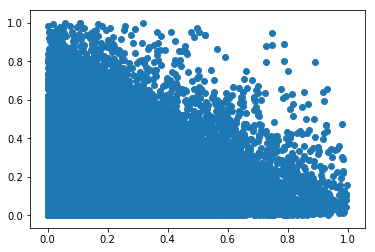

In [28]:
plt.figure()
plt.scatter(exc.iloc[:,7],exc.iloc[:,8])
plt.show()